# BRINGING IN LIHTC DATA. CLEANING IT, AND EXPLORING. 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from itertools import cycle, islice

# This line lets us plot on our ipython notebook
%matplotlib inline

In [4]:
# read in DBF with LIHTC data
df_lihtc = pd.read_table('lihtc_data/LIHTCPUB.csv', sep=',', low_memory=False)
df_lihtc.head()

,"HUD_ID,C,10","PROJECT,C,58","PROJ_ADD,C,66","PROJ_CTY,C,28","PROJ_ST,C,2","PROJ_ZIP,N,5,0","STATE_ID,C,23","CONTACT,C,54","COMPANY,C,74","CO_ADD,C,58",...,"LI_UNITR,N,4,0","METRO,N,1,0","DDA,N,1,0","QCT,N,1,0","NONPROG,N,1,0","DATANOTE,C,236","X,N,20,18","Y,N,18,15","Z,N,17,15","YRMISFLG,N,1,0"
0,AKA1987005,GLACIER PARK,660 S YORKTOWN DR,KETCHIKAN,AK,99901.0,AK-87-00001,LEN BRENNEN,SHELTER RESOURCES INC,2223 112TH AVE NE STE 102,...,21.0,3.0,2.0,2.0,0.0,NaN,-0.377783,-0.424978,0.822602,0
1,AKA1989010,PARK WEST APTS,2012 SANDVIK ST,FAIRBANKS,AK,99709.0,AK-89-00001,DON BELL,FAIRBANKS ASSOC LP,1001 PACIFIC AVE STE 400,...,81.0,1.0,2.0,2.0,0.0,NaN,-0.359615,-0.226432,0.905210,0
2,AKA1990005,TYSON'S TERRACE,103 BURKHART DR,SITKA,AK,99835.0,AK-90-00001,MARTY FRANTZ,HAINES ASSOC,PO BOX 1044,...,16.0,3.0,0.0,2.0,0.0,NaN,-0.386630,-0.382583,0.839135,0
3,AKA1991005,NORTHWOOD APTS,190 PARKWOOD CIR,SOLDOTNA,AK,99669.0,AK-91-00001,MARTY FRANTZ,HAINES ASSOC,PO BOX 1044,...,22.0,3.0,0.0,2.0,0.0,NaN,-0.431135,-0.238256,0.870262,0
4,AKA1992005,DUSTY TRAILS APTS,NaN,HAINES,AK,NaN,AK-91-00002,MARTY FRANTZ,HAINES ASSOC,PO BOX 1044,...,31.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0


In [5]:
# how many rows and columns
df_lihtc.shape

(43092, 96)

In [8]:
# look at the columns
df_lihtc.columns

Index(['HUD_ID,C,10', 'PROJECT,C,58', 'PROJ_ADD,C,66', 'PROJ_CTY,C,28',
       'PROJ_ST,C,2', 'PROJ_ZIP,N,5,0', 'STATE_ID,C,23', 'CONTACT,C,54',
       'COMPANY,C,74', 'CO_ADD,C,58', 'CO_CTY,C,22', 'CO_ST,C,2',
       'CO_ZIP,C,10', 'CO_TEL,C,17', 'LATITUDE,N,9,6', 'LONGITUDE,N,11,6',
       'REG,N,1,0', 'MSA,N,4,0', 'CBSA,N,5,0', 'PLACECE,N,4,0',
       'PLACEFP,N,5,0', 'COSUBCUR,N,5,0', 'FIPS1990,N,11,0', 'ST1990,N,2,0',
       'CNTY1990,N,3,0', 'TRCT1990,N,7,2', 'FIPS2000,N,11,0', 'ST2000,N,2,0',
       'CNTY2000,N,3,0', 'TRCT2000,N,7,2', 'BG2000,N,1,0', 'FIPS2010,N,11,0',
       'ST2010,N,2,0', 'CNTY2010,N,3,0', 'TRCT2010,N,7,2', 'ALLOCAMT,N,10,2',
       'N_UNITS,N,4,0', 'LI_UNITS,N,4,0', 'N_0BR,N,3,0', 'N_1BR,N,3,0',
       'N_2BR,N,4,0', 'N_3BR,N,3,0', 'N_4BR,N,3,0', 'INC_CEIL,N,1,0',
       'LOW_CEIL,N,1,0', 'CEILUNIT,N,3,0', 'YR_PIS,N,4,0', 'YR_ALLOC,N,5,0',
       'NON_PROF,N,1,0', 'BASIS,N,1,0', 'BOND,N,1,0', 'MFF_RA,N,1,0',
       'MFF_RA_ID,C,11', 'FMHA_514,N,1,0', 'RDNUM_

In [6]:
# look at the HUD IDs
df_lihtc['HUD_ID,C,10']

0        AKA1987005
1        AKA1989010
2        AKA1990005
3        AKA1991005
4        AKA1992005
5        AKA1993005
6        AKA1993010
7        AKA1994005
8        AKA1994010
9        AKA1994015
10       AKA1995005
11       AKA1995010
12       AKA1995015
13       AKA1996005
14       AKA1996010
15       AKA1996015
16       AKA1996020
17       AKA1996025
18       AKA1997005
19       AKA1997010
20       AKA1997015
21       AKA1997020
22       AKA1997025
23       AKA1997030
24       AKA1997035
25       AKA1997040
26       AKA1998005
27       AKA1998010
28       AKA1998015
29       AKA1998025
            ...    
43062    WYA2008015
43063    WYA2008025
43064    WYA2008030
43065    WYA2008032
43066    WYA2008033
43067    WYA2008035
43068    WYA2009005
43069    WYA2009010
43070    WYA2009015
43071    WYA2009800
43072    WYA2010005
43073    WYA2010007
43074    WYA2010008
43075    WYA2010010
43076    WYA2010015
43077    WYA2011050
43078    WYA2011055
43079    WYA2011060
43080    WYA2012010


In [7]:
# filter out HUD_IDs that start with PAA (pennsylvania housing finance agency)
df_paa = df_lihtc[df_lihtc['HUD_ID,C,10'].str.contains("PAA")]
df_paa

,"HUD_ID,C,10","PROJECT,C,58","PROJ_ADD,C,66","PROJ_CTY,C,28","PROJ_ST,C,2","PROJ_ZIP,N,5,0","STATE_ID,C,23","CONTACT,C,54","COMPANY,C,74","CO_ADD,C,58",...,"LI_UNITR,N,4,0","METRO,N,1,0","DDA,N,1,0","QCT,N,1,0","NONPROG,N,1,0","DATANOTE,C,236","X,N,20,18","Y,N,18,15","Z,N,17,15","YRMISFLG,N,1,0"
32426,PAA0000001,328 N HOLLY (IMANI),328 N HOLLY ST,PHILADELPHIA,PA,19104.0,TC19960130,NaN,NaN,NaN,...,1.0,2.0,NaN,NaN,0.0,NaN,0.195722,-0.741093,0.642242,0
32427,PAA0000002,3RD EAST HILLS,BRACEY DR,PITTSBURGH,PA,NaN,TC20090508,NaN,NaN,NaN,...,47.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0
32428,PAA0000003,400 MAIN,400 MAIN ST,TOWANDA,PA,18848.0,PA1012-1194,NaN,NaN,NaN,...,38.0,3.0,NaN,NaN,NaN,Property record added from HUD study data file.,0.174837,-0.725088,0.666092,0
32429,PAA0000004,509 ASHBOURNE ROAD,1509 ASHBOURNE RD,ELKINS PARK,PA,19027.0,TC20090620,NaN,NaN,NaN,...,85.0,1.0,NaN,NaN,0.0,NaN,0.196381,-0.739636,0.643718,0
32430,PAA0000005,810 ARCH STREET,810 ARCH ST,PHILADELPHIA,PA,19107.0,PA1012-1120,NaN,NaN,NaN,...,94.0,2.0,NaN,NaN,NaN,Property record added from HUD study data file.,0.196412,-0.740981,0.642160,0
32431,PAA0000006,9TH & BERKS STREET TOD,1900 N NINTH ST,PHILADELPHIA,PA,19122.0,PA1012-1176,NaN,NaN,NaN,...,53.0,2.0,NaN,NaN,NaN,Property record added from HUD study data file.,0.196398,-0.740665,0.642529,0
32432,PAA0000007,AARON MICHAELS PLACE,NaN,ERIE,PA,NaN,TC19990048,NaN,NaN,NaN,...,18.0,NaN,NaN,NaN,0.0,Property identified in 2014 LIHTC tenant data ...,NaN,NaN,NaN,0
32433,PAA0000008,ABC TAMAQUA HI-RISE,222 E BROAD ST,TAMAQUA,PA,18252.0,TC20000073,NaN,NaN,NaN,...,106.0,3.0,NaN,NaN,0.0,NaN,0.183566,-0.734434,0.653384,0
32434,PAA0000009,ADDISON TERRACE PHASE 1,2136 ELMORE SQ,PITTSBURGH,PA,NaN,PA1012-1163,NaN,NaN,NaN,...,80.0,2.0,NaN,NaN,NaN,Property record added from HUD study data file.,0.132459,-0.749441,0.648686,0
32435,PAA0000011,ALLEGHENY COMMONS EAST,255 E OHIO ST,PITTSBURGH,PA,15212.0,TC20030309,NaN,NaN,NaN,...,130.0,2.0,NaN,NaN,0.0,Previously listed as PAA0000010.,0.132097,-0.749386,0.648823,0


In [8]:
# chart out projects by city

# check for any null entries in project_city
df_paa['PROJ_CTY,C,28'].isnull()
# get rid of null entries 
df_paa = df_paa[df_paa['PROJ_CTY,C,28'].notnull()] #no null entries in proj_cty
df_paa.shape

(1719, 96)

In [28]:
# view the unique cities with projects
df_paa['PROJ_CTY,C,28'].unique()

array(['PHILADELPHIA', 'PITTSBURGH', 'TOWANDA', 'ELKINS PARK', 'ERIE',
       'TAMAQUA', 'ALLENTOWN', 'HARRISBURG', 'WILLIAMSPORT', 'GREENVILLE',
       'LITITZ', 'BENSALEM', 'MONROEVILLE', 'EASTON', 'CARNEGIE',
       'LEWISBURG', 'CHAMBERSBURG', 'FRIENDSVILLE', 'LOCK HAVEN',
       'BERWICK', 'WILKINSBURG', 'ALIQUIPPA', 'BROOKVILLE',
       'MC CONNELLSBURG', 'CHESTER', 'SCRANTON', 'DENVER', 'HATFIELD',
       'COATESVILLE', 'CLARION', 'DU BOIS', 'CARLISLE', 'EDWARDSVILLE',
       'GETTYSBURG', 'FAIRVIEW', 'PHOENIXVILLE', 'FARRELL', 'FLEETWOOD',
       'BELLEFONTE', 'LEVITTOWN', 'MECHANICSBURG', 'DARBY', 'SHARON HILL',
       'NEW BRIGHTON', 'HOMESTEAD', 'BETHLEHEM', 'DUQUESNE', 'BANGOR',
       'NORRISTOWN', 'MEYERSDALE', 'WEST VIEW', 'BLOOMSBURG', 'EPHRATA',
       'FREELAND', 'LANSDALE', 'FREDONIA', 'READING', 'BRIDGEVILLE',
       'PUNXSUTAWNEY', 'KENNETT TOWNSHIP', 'HANOVER', 'WILKES BARRE',
       'DANVILLE', 'MATAMORAS', 'WEST CHESTER', 'DILLSBURG', 'EDINBORO',
       'WEST PI

In [9]:
# group data by project city and sum in a table
grouped = df_paa.groupby('PROJ_CTY,C,28') # Group by project city
summed = grouped['PROJ_CTY,C,28'].count() # Get counts of each group
summed.sort_values(inplace=True, ascending=False)
df_summed = summed.to_frame()
df_summed.columns = ['PROJECTS']
df_summed.index.names = ['CITY']
df_summed

,PROJECTS
CITY,
PHILADELPHIA,517
PITTSBURGH,113
HARRISBURG,65
CHESTER,39
ALLENTOWN,35
YORK,28
LANCASTER,25
BETHLEHEM,23
COATESVILLE,23


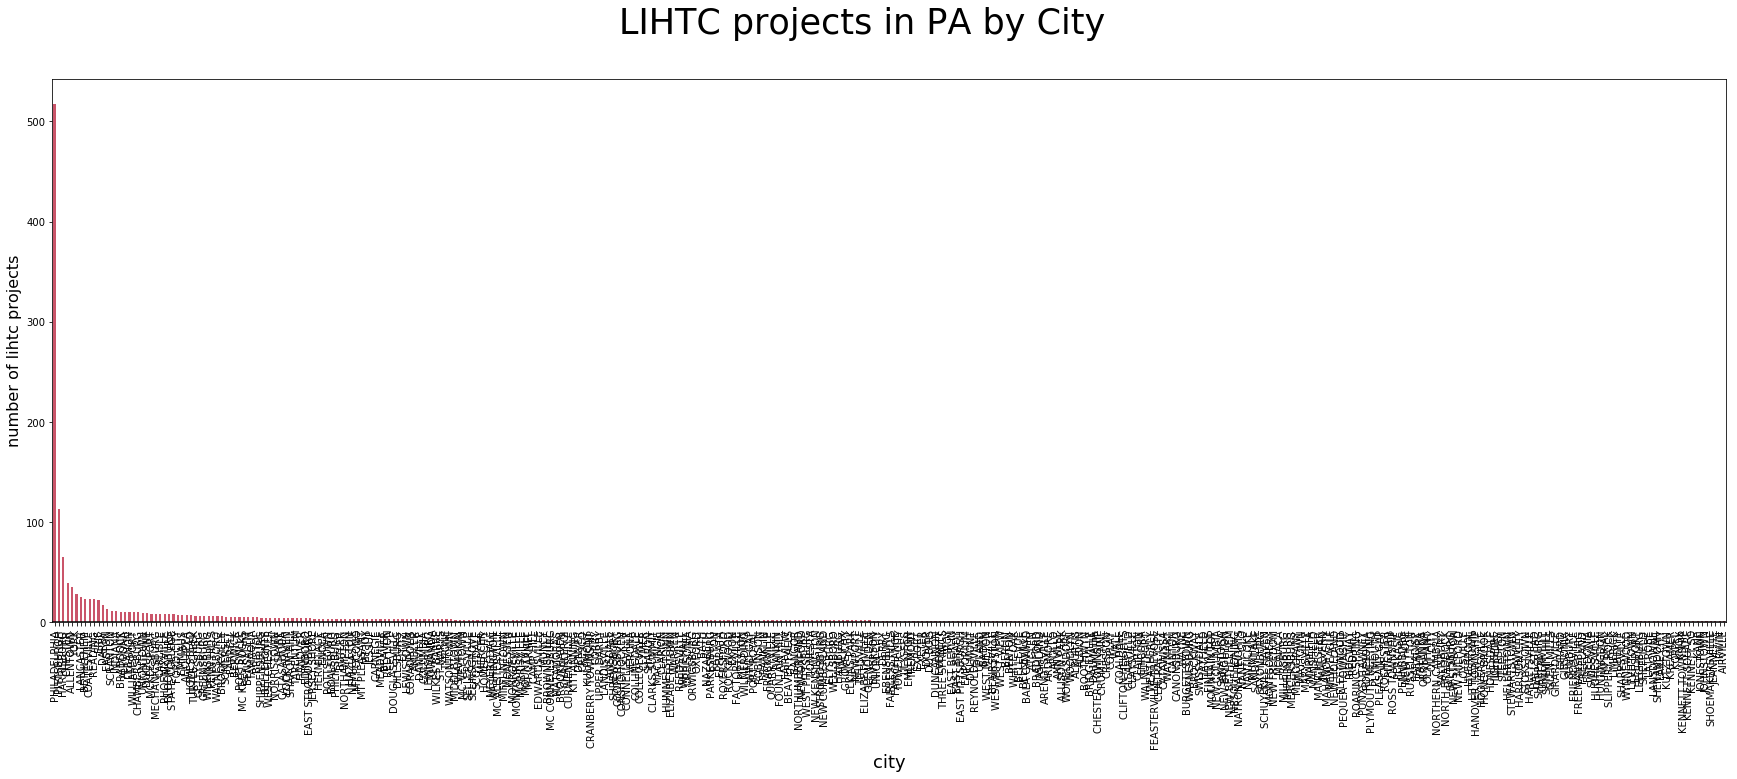

In [10]:
# basic bar chart -- doesn't say much as is. 
df_summed.plot.bar(color=['#ca556a'], legend=None, figsize=(30,10));
plt.axhline(0, color='k')
plt.suptitle('LIHTC projects in PA by City', fontsize=35)
plt.xlabel('city', fontsize=18)
plt.ylabel('number of lihtc projects', fontsize=16)

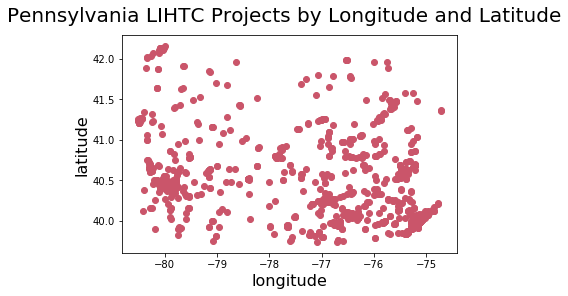

In [11]:
# Scatter Plot of Longs & Lats
plt.scatter(df_paa['LONGITUDE,N,11,6'],df_paa['LATITUDE,N,9,6'], color = '#ca556a')
plt.suptitle('Pennsylvania LIHTC Projects by Longitude and Latitude', fontsize=20)
plt.xlabel('longitude', fontsize=16)
plt.ylabel('latitude', fontsize=16)
plt.show()

In [12]:
# look at projects by year placed in service
df_paa['YR_PIS,N,4,0'].unique()

array([8888, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1995, 1996, 1994,
       1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2011, 2006,
       2007, 2008, 2009, 2010, 2012, 2013, 2014])

In [56]:
# group data by year placed in service and sum in a table
grouped_yr = df_paa.groupby('YR_PIS,N,4,0') # Group by project city
summed_yr = grouped_yr['YR_PIS,N,4,0'].count() # Get counts of each group
summed_yr.sort_values(inplace=True, ascending=False)
df_summed_yr = summed_yr.to_frame()
df_summed_yr.columns = ['PROJECTS']
df_summed_yr.index.names = ['YEAR']
df_summed_yr

,PROJECTS
YEAR,
8888,256
1989,159
1988,137
1991,121
1990,90
1987,79
1999,71
1994,70
1993,59


In [13]:
# look at projects by year placed in service
df_paa['YR_ALLOC,N,5,0'].unique()

array([8888, 2013, 2011, 2012, 2003, 2004, 1987, 2005, 1988, 1989, 1990,
       1991, 1992, 1993, 1995, 1994, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2006, 2007, 2008, 2009, 2010, 2014, 2015])

In [15]:
# group data by year allocated and sum in a table
grouped_alloc = df_paa.groupby('YR_ALLOC,N,5,0') # Group by project city
summed_alloc = grouped_alloc['YR_ALLOC,N,5,0'].count() # Get counts of each group
summed_alloc.sort_values(inplace=True, ascending=False)
df_summed_alloc = summed_alloc.to_frame()
df_summed_alloc.columns = ['PROJECTS']
df_summed_alloc.index.names = ['YEAR']
df_summed_alloc

,PROJECTS
YEAR,
1989,211
8888,186
1988,151
1991,126
1990,86
1994,84
1987,80
1996,57
1995,56


In [16]:
df_paa['NONPROG,N,1,0'].unique()

array([  0.,  nan,   1.])

In [17]:
# group data by in-program or not and sum in a table
grouped_non = df_paa.groupby('NONPROG,N,1,0') # Group by project city
summed_non = grouped_non['NONPROG,N,1,0'].count() # Get counts of each group
summed_non.sort_values(inplace=True, ascending=False)
df_summed_non = summed_non.to_frame()
df_summed_non.columns = ['PROJECTS']
df_summed_non.index.names = ['YEAR']
df_summed_non

,PROJECTS
YEAR,
0.0,1035
1.0,644
